In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import statistics
import time
from tqdm import tqdm
sys.path.append(os.path.dirname(os.getcwd()))

from problems.problem_4.p4_a import most_frequent_difference_a
from problems.problem_4.p4_b import most_frequent_difference_b

In [2]:
def calculate_most_common_difference(list_of_random_integers):
    """Calculates the most common difference between all the values in a list of random integers.

  Args:
    list_of_random_integers: A list of random integers.

  Returns:
    The most common difference between all the values in the list.
  """

    # Calculate the difference between each pair of elements in the list.
    differences = []
    for i in range(len(list_of_random_integers) - 1):
        differences.append(list_of_random_integers[i + 1] - list_of_random_integers[i])

    # Create a dictionary to store the frequency of each difference.
    difference_counts = {}
    for difference in differences:
        if difference in difference_counts:
            difference_counts[difference] += 1
        else:
            difference_counts[difference] = 1

    # Find the key in the dictionary with the highest value.
    most_common_difference = max(difference_counts.keys(), key=lambda key: difference_counts[key])

    return most_common_difference

In [3]:
## Get run times 
a_times = []
b_times = []

# List sizes
sizes = [int(i) for i in np.linspace(2, 100000, 50)]


# Get run times
for size in tqdm(sizes):
    
    a_times_single_size = []
    b_times_single_size = []
    
    for _ in range(10):
        data_i = [random.randint(-100, 100) for i in range(0,size)]
        mode_i = calculate_most_common_difference(data_i)

        # time a
        start_time = time.time()
        most_frequent_difference_a(data_i, mode_i) # run function
        a_times_single_size.append(time.time() - start_time)

        # time b
        start_time = time.time()
        most_frequent_difference_b(data_i, mode_i) # run function
        b_times_single_size.append(time.time() - start_time)
        
    
    a_times.append(statistics.median(a_times_single_size))
    b_times.append(statistics.median(b_times_single_size))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:58<00:00,  2.38s/it]


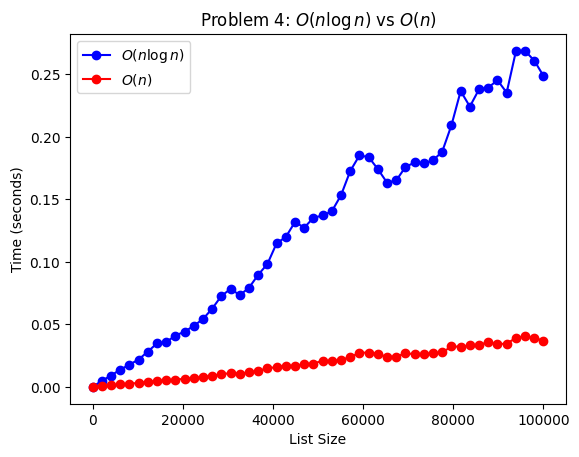

In [4]:
# Plotting
plt.plot(sizes, a_times, marker='o', label='$O(n\log n)$', color='blue')
plt.plot(sizes, b_times, marker='o', label='$O(n)$', color='red')
plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Problem 4: $O(n\log n)$ vs $O(n)$')
plt.legend()
plt.savefig(os.path.dirname(os.getcwd()) + '/latex/figures/problem-4.png')